<a href="https://colab.research.google.com/github/LauraGuio/MachineLearning/blob/master/C2_P1_load_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Importar librerías**

In [9]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline

**2.Cargar DataSet desde Sklearn.dataset**

In [10]:
from sklearn import datasets
db_wine = datasets.load_wine()
print(db_wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

**3.Convertir en DataFrame**

In [48]:
df_wine = pd.DataFrame(db_wine.data, columns=db_wine.feature_names)
df_wine['wine_class']=db_wine.target
df_wine.head(150)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2
146,13.88,5.04,2.23,20.0,80.0,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415.0,2
147,12.87,4.61,2.48,21.5,86.0,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625.0,2
148,13.32,3.24,2.38,21.5,92.0,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650.0,2


**4.Conociendo los datos**

In [12]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


**3.1Graficamos los datos**

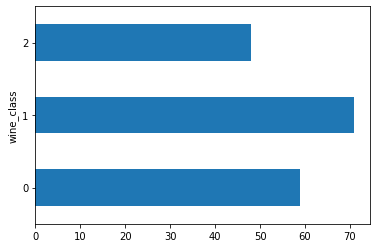

In [13]:
df_wine.groupby('wine_class').size().plot.barh()

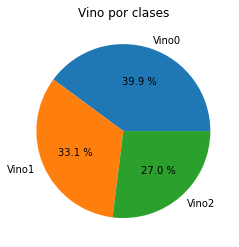

In [63]:
#vinos por clase (0,1,2)
datos= df_wine.wine_class.value_counts(normalize=True)
plt.pie(datos,labels=["Vino0","Vino1","Vino2"],autopct="%0.1f %%")
plt.title("Vino por clases")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


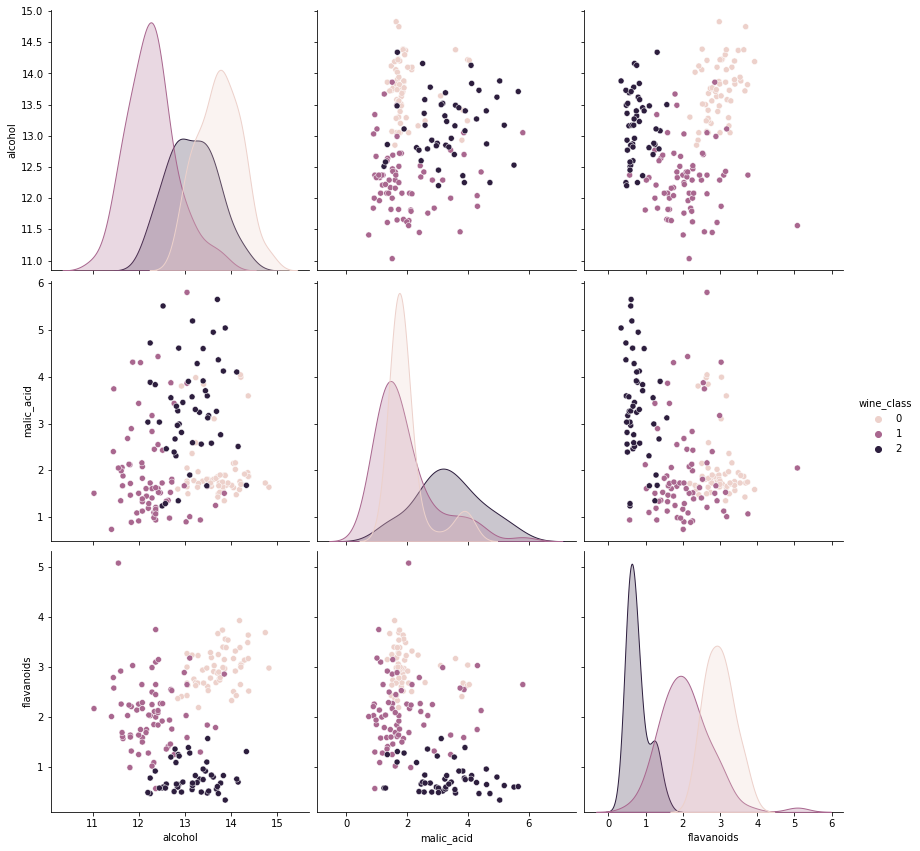

In [15]:
sbn.pairplot(df_wine, hue="wine_class",size=4, vars=["alcohol","malic_acid","flavanoids"], kind='scatter')

**4. Separamos datos en X y Y**

In [32]:
x=df_wine.drop('wine_class', axis=1)
y=df_wine.wine_class

**5.Dividimos en TRAIN y TEST**

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=110,test_size=0.3)

#Regresión logística

##6.Importamos clase Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
regresion_logistica = LogisticRegression()

##7.Entrenamos

In [39]:
regresion_logistica.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##8.Predicciones

In [40]:
y_prediccion=regresion_logistica.predict(x_test)

##9.Generando probabilidad de predicción

In [41]:
exactitud=metrics.accuracy_score(y_test,y_prediccion)
print('Exactitud porcentaje ' + str(100*exactitud))

Exactitud porcentaje 96.29629629629629


##10.Con datos manuales...

In [50]:
wine=np.array([[14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0],[11.66,1.88,1.92,16.0,97.0,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428.0],
               [13.88,5.04,2.23,20.0,80.0,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415.0]])
x_nuevo=pd.DataFrame(wine, columns=['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols',
                                    'proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline'])
y_prediccion=regresion_logistica.predict(x_nuevo)
print(y_prediccion)

[0 1 2]


Los dato utilizados fueron tomados del DataSet original, donde el primer set de datos debía ser de la clase de vino 0, el set 2 de la clase de vino 1 y el set 3 de la clase de vino 2.

#Árbol de decisión 

##6.Probamos diferentes profundidades

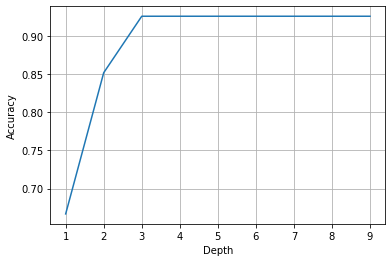

In [74]:
depth_list=list(range(1,10))
accuracy_list=[]
for depth in depth_list:
  arbol=DecisionTreeClassifier(max_depth=depth, random_state=0)
  arbol.fit(x_train,y_train)
  score=arbol.score(x_test,y_test)
  accuracy_list.append(score)
plt.plot(depth_list, accuracy_list)
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.grid(True)
plt.show()

##7.Importamos clase Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(max_depth=3,random_state=0)

##8.Entrenamos

In [76]:
arbol.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

##9.Predicciones

In [77]:
from sklearn.metrics import accuracy_score
y_train_predi=arbol.predict(x_train)
y_test_predi= arbol.predict(x_test)
print("Accuracy of test: %"+ str(accuracy_score(y_test_predi, y_test)))
print("Accuracy Global %"+ str(arbol.score(x_test,y_test)))

Accuracy of test: %0.9259259259259259
Accuracy Global %0.9259259259259259


##10.Graficamos el árbol


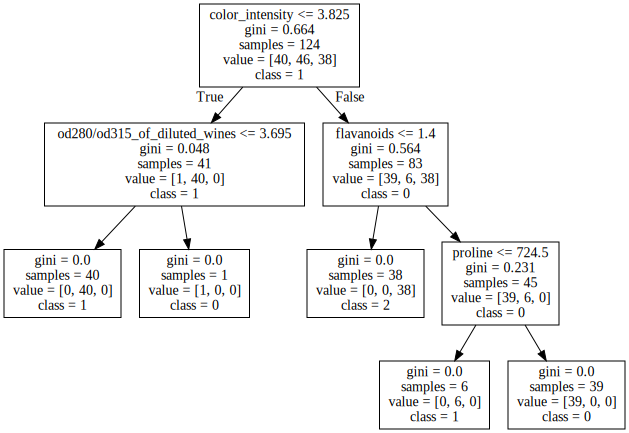

In [82]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(arbol, out_file="wine.dot", class_names=["0", "1","2"],
                feature_names=x.columns)
with open("wine.dot") as f:
  graph = f.read()
graphviz.Source(graph)

#Redes bayesianas

##6.Instanciar GaussianNB

In [ ]:
naba_wine=GaussianNB()
naba_wine.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

##7.Realizar predicciones

In [ ]:
y_pred= naba_wine.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy wine Naive Bayes: ' +str(accuracy*100))

Accuracy wine Naive Bayes: 90.74074074074075


#Super Vector Machine

##6.Matriz de correlación

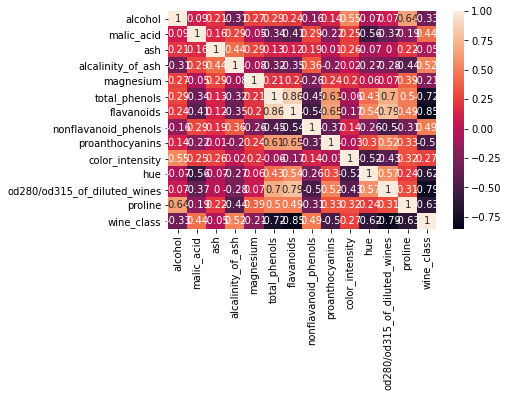

In [85]:
corr_matrix=df_wine.corr().round(2)
sbn.heatmap(data=corr_matrix, annot=True)

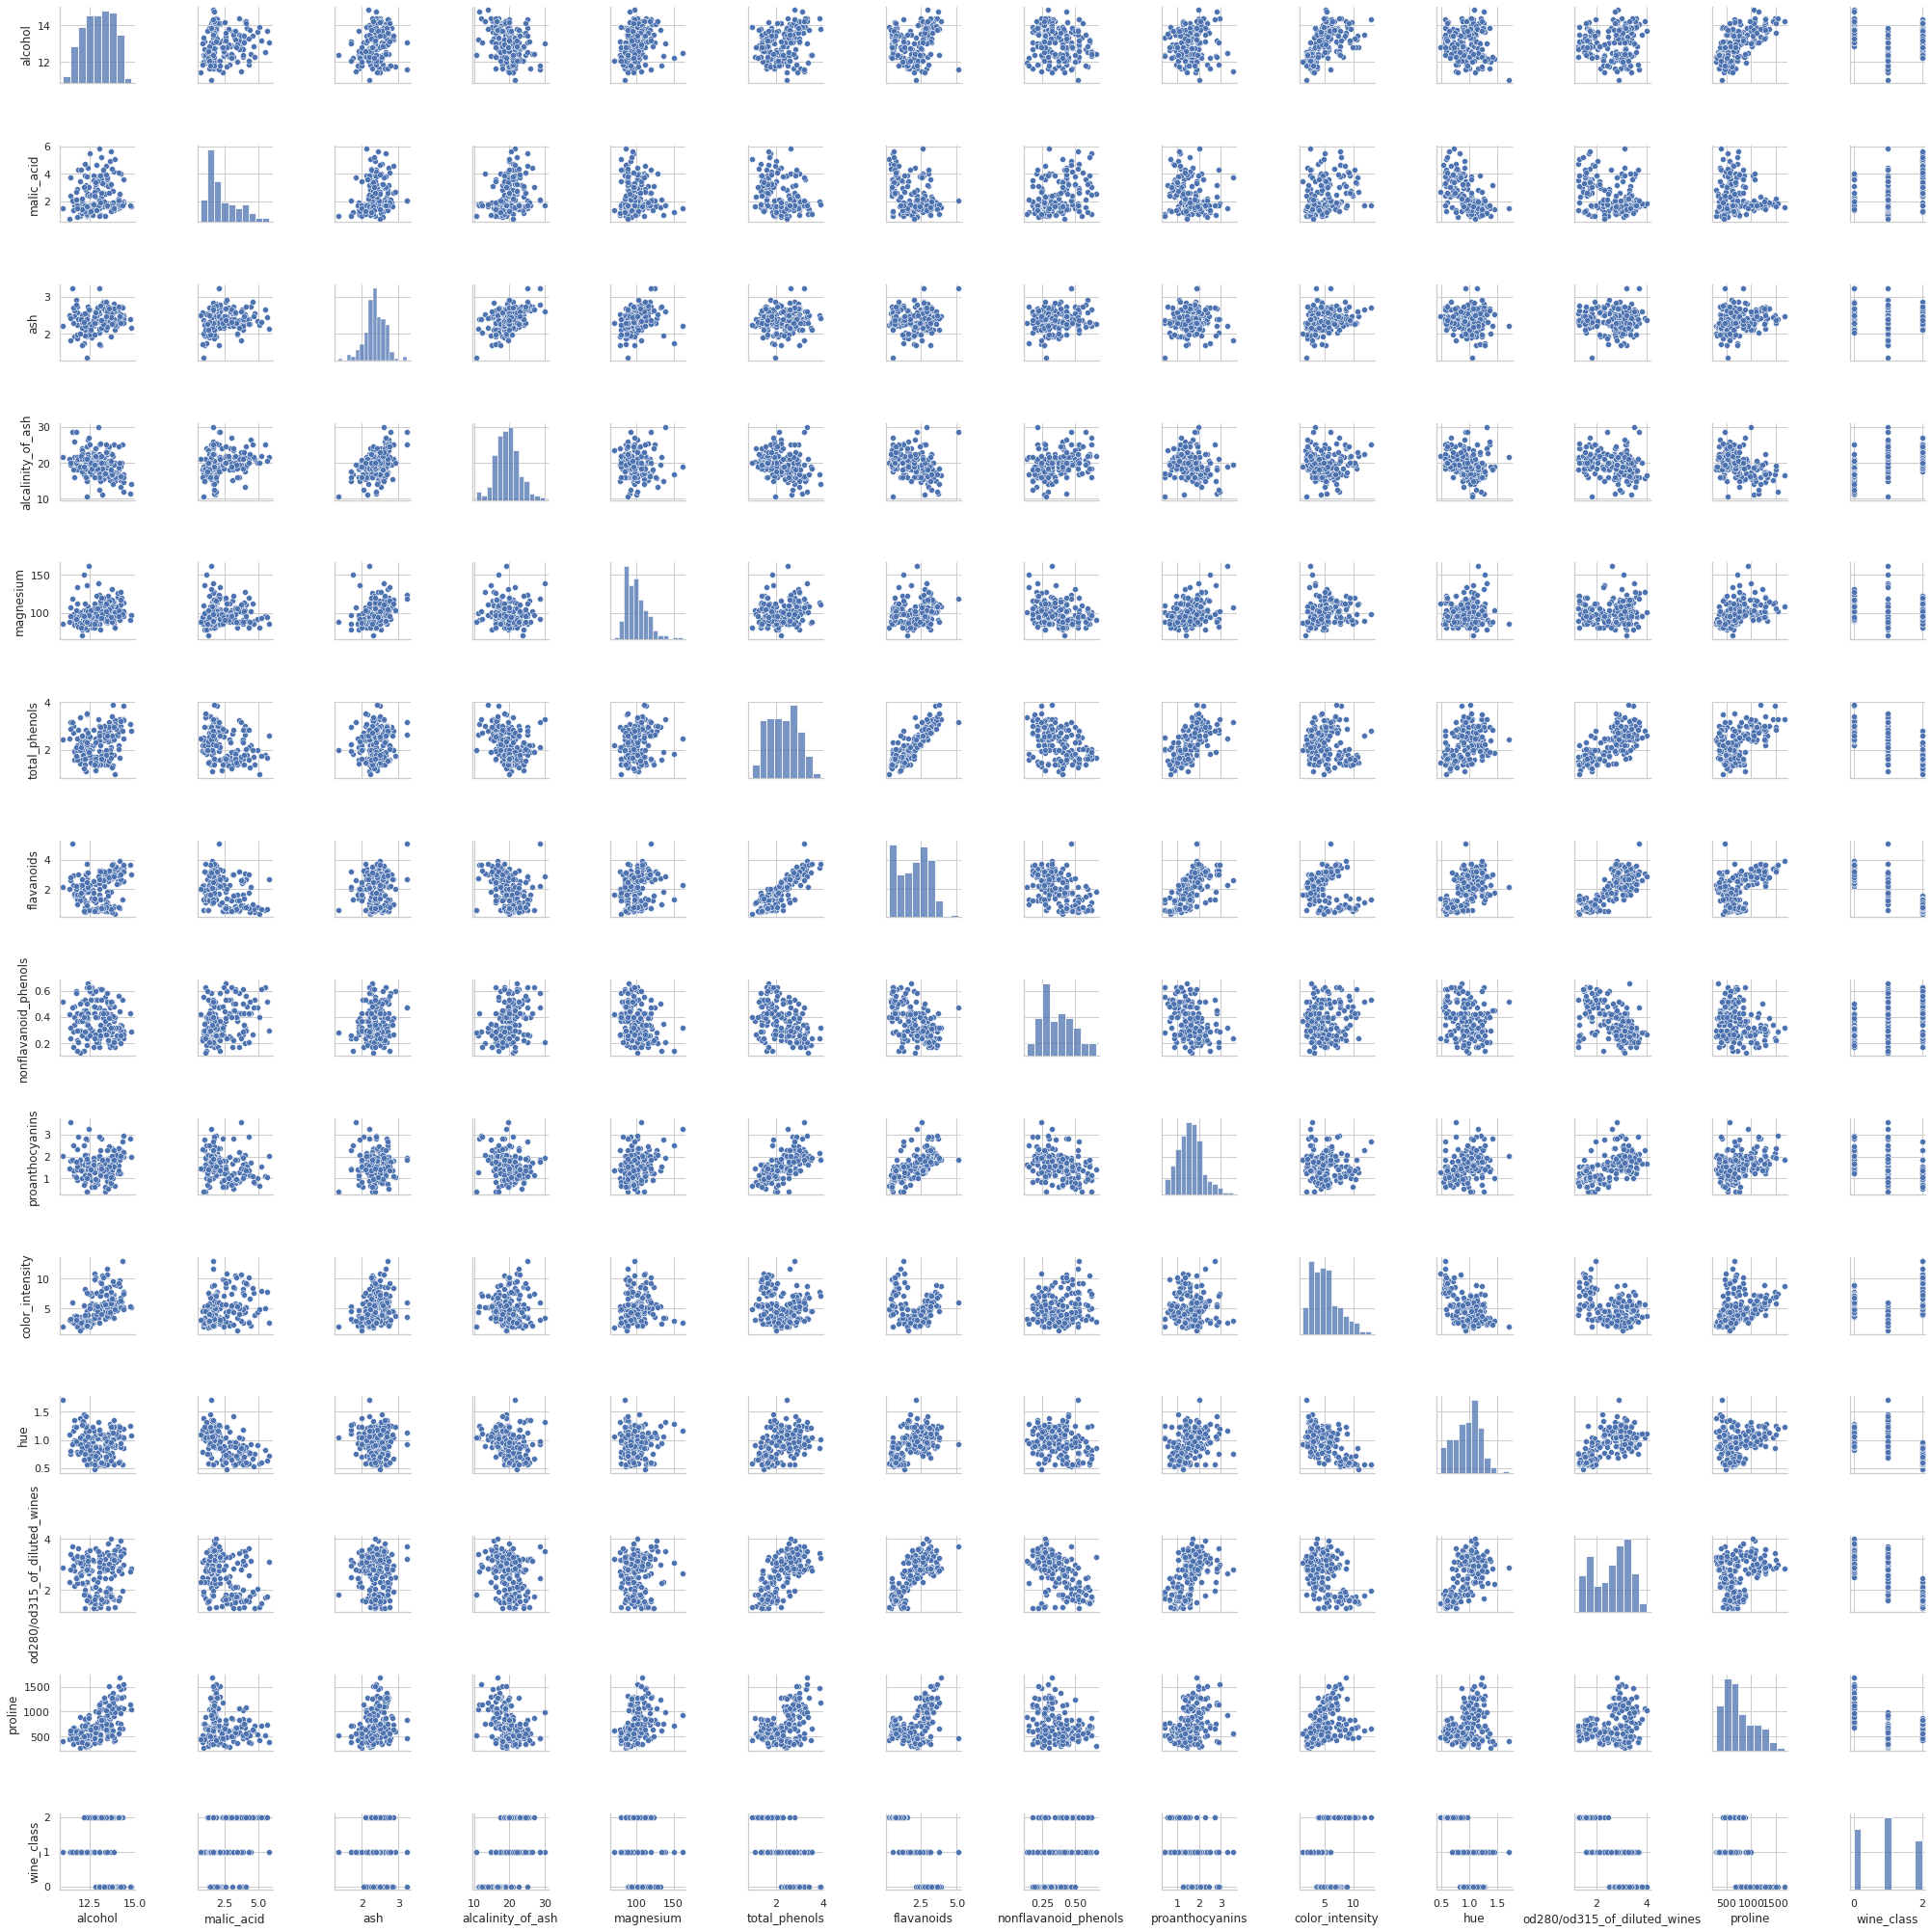

In [87]:
sbn.set(style="whitegrid", context="notebook")
plot_data=df_wine.columns
sbn.pairplot(df_wine[plot_data],height=2)
plt.tight_layout()
plt.show()

##7.Instanciamos SVM y entrenamos

In [100]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##8.Realizamos predicciones

In [101]:
y_pred = svm.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy load_wine SVM: ' +str(accuracy*100))

Accuracy load_wine SVM: 92.5925925925926


#Conclusión

Realizando los 4 algortimos, se obtuvieron los siguiente resultados en cuanto a precisión: 
*   SVM -> 92.592%
*   Redes Bayesianas -> 90.74%
*   Árbol de decisión -> 92.592%
*   Regresión logística -> 96.296%

Podemos concluir que el mejor algortimo que se puede aplicar para este DataSet es la regresión logística.